In [2]:
#Importing necessarylibrary
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("emails.csv")
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
data.shape


(5728, 2)

In [5]:
data['text'][0]


"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [6]:
data['spam'].value_counts()


0    4360
1    1368
Name: spam, dtype: int64

In [7]:
import seaborn as sns

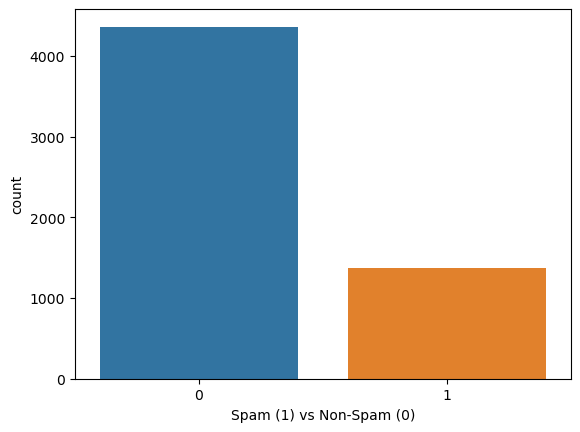

In [8]:
sns.countplot(x='spam', data=data)
plt.xlabel('Spam (1) vs Non-Spam (0)')
plt.show()

#  Separate in X and Y

In [9]:
x=data['text'].values

y=data['spam'].values

In [10]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

# Train - Test split

In [11]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

x = data['text'].values
y = data['spam'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [12]:
X_train.shape

(4582,)

In [13]:
X_test.shape

(1146,)

In [14]:
y_train.shape

(4582,)

In [15]:
y_test.shape

(1146,)

# Preprocessing

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
cv=CountVectorizer()

# Training by  ML Algorithm

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
nb = MultinomialNB()

In [19]:
pipe = make_pipeline(cv,nb)

In [20]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [21]:
y_pred = pipe.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9869109947643979

In [23]:
email = ['Hey i am Elon Musk. Get a brand new car from Tesla']
pipe.predict(email)

array([1], dtype=int64)

In [ ]:
import pickle 
pickle.dump(pipe, open("Naive_model.pkl"))

FileNotFoundError: [Errno 2] No such file or directory: 'Naive_model.pkl'